In [2]:
#Importing Libraries for the data

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import iplot
from scipy.stats import skew, kurtosis

### Now, Let us see the data in the csv file

In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Getting all the data and making the unix timestamp into date and time

import pandas as pd

# Load your CSV file into a DataFrame
data_boo = pd.read_csv('/kaggle/input/btcusdt-different-timeframes/BTCUSDT-5m.csv')

# Convert Unix timestamp column to datetime
data_boo['open_time'] = pd.to_datetime(data_boo['open_time'], unit='ms')

start_date = '2018-01-01'
end_date = '2022-01-31'

# Filter the DataFrame to include only rows within the specified date range
data = data_boo[(data_boo['open_time'] >= start_date) & (data_boo['open_time'] <= end_date)]

data = data.rename(columns={
    'open': 'Open',
    'close': 'Close',
    'high': 'High',
    'low': 'Low',
    'volume': 'Volume'
})

# Now your DataFrame has the column with datetime values
print(data)

                 open_time      Open      High       Low     Close  \
39304  2018-01-01 00:00:00  13715.65  13715.65  13576.28  13600.00   
39305  2018-01-01 00:05:00  13600.00  13600.00  13501.01  13554.58   
39306  2018-01-01 00:10:00  13554.58  13569.97  13400.01  13556.15   
39307  2018-01-01 00:15:00  13533.75  13547.73  13402.00  13430.52   
39308  2018-01-01 00:20:00  13440.01  13459.99  13410.44  13439.94   
...                    ...       ...       ...       ...       ...   
467113 2022-01-30 23:40:00  37950.55  37979.31  37875.58  37959.87   
467114 2022-01-30 23:45:00  37959.87  37959.88  37876.94  37896.41   
467115 2022-01-30 23:50:00  37896.41  37948.79  37870.00  37928.03   
467116 2022-01-30 23:55:00  37928.04  37945.25  37870.00  37881.76   
467117 2022-01-31 00:00:00  37881.75  37951.07  37869.98  37872.66   

            Volume  num_trades  taker_base_vol  
39304    33.617798         435       18.266958  
39305    40.528679         632       20.380099  
39306    49.

### Visualizing the Data in CandleStick Format

In [5]:
'''figure = go.Figure(data=[go.Candlestick(x=data["open_time"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "BTC Stock Price Analysis", xaxis_rangeslider_visible=True)
figure.show()'''

'figure = go.Figure(data=[go.Candlestick(x=data["open_time"],\n                                        open=data["Open"], high=data["High"],\n                                        low=data["Low"], close=data["Close"])])\nfigure.update_layout(title = "BTC Stock Price Analysis", xaxis_rangeslider_visible=True)\nfigure.show()'

### Making the Train and Vadiation

In [6]:
print(len(data))

427814


In [7]:
n = 14
sp = 1
st = 90
time_steps = 7

In [8]:

data_train = data.iloc[st:-sp].copy()
C_entire = data[["Close"]].to_numpy().astype(np.float32)

#-------------------------------------------------SAR-----------------------------------------------------------------

#Open is O
O = data_train[["Open"]].to_numpy().astype(np.float32).copy()

#for MACD - Moving Averages Convergence Divergence
EMA_26 = sum([C_entire[st-27+i] for i in range(26)])/26
EMA_12 = sum([C_entire[st-13+i] for i in range(12)])/12
MA_t = sum([C_entire[st-22+i] for i in range(12)])/21
MACD = []
EMA = []
MA = []
for i in range(len(data_train)):
    EMA_26 = (2/27)*(C_entire[st + i-1]-EMA_26) + EMA_26        
    EMA_12 = (2/13)*(C_entire[st + i-1]-EMA_12) + EMA_12
    MA_t = C_entire[st + i-1]/21 + MA_t - C_entire[st + i-1-21]/21
    MACD.append(EMA_26 - EMA_12)
    EMA.append(EMA_12)
    MA.append(MA_t)
MACD = np.array(MACD)
EMA = np.array(EMA)
MA = np.array(MA)

    
    
    
'''#For Volume Weighted Price
ts_Vn = 7
ts_V = []
V_entire = data[["Volume"]].to_numpy().astype(np.float32)
H = data_train[["High"]].to_numpy().astype(np.float32).copy()
L = data_train[["Low"]].to_numpy().astype(np.float32).copy()
C = data_train[["Close"]].to_numpy().astype(np.float32).copy()
V = data_train[["Volume"]].to_numpy().astype(np.float32).copy()
for i in range(st-ts_Vn,len(data) - ts_Vn - sp):
    temp = np.mean(V_entire[i-1:i-1+ts_Vn]) 
    ts_V.append(temp)
ts_V = np.array(ts_V).reshape([len(ts_V),1])
Price1 = []
Price1.append(float(data[["Volume"]].to_numpy().astype(np.float32)[-1]*(data[["Low"]].to_numpy().astype(np.float32)[-1]+data[["High"]].to_numpy().astype(np.float32)[-1]+(data[["Close"]].to_numpy().astype(np.float32)[-1]/3))))
Price1 = np.expand_dims(Price1,axis=1)
Price2 = np.multiply(V,H+L+(C/3))[:-1]
Price = np.concatenate((Price1,Price2),axis=0)
Price = np.divide(Price,ts_V)'''





ts_Hn_28 = 28
ts_H_28 = []
H_entire = data[["High"]].to_numpy().astype(np.float32)
for i in range(st-ts_Hn_28,len(data) - ts_Hn_28 - sp):
    temp = np.mean(H_entire[i-1:i-1+ts_Hn_28]) 
    ts_H_28.append(temp)
ts_Hn_21 = 21
ts_H_21 = []
for i in range(st-ts_Hn_21,len(data) - ts_Hn_21 - sp):
    temp = np.mean(H_entire[i-1:i-1+ts_Hn_21]) 
    ts_H_21.append(temp)
ts_Hn_14 = 14
ts_H_14 = []
for i in range(st-ts_Hn_14,len(data) - ts_Hn_14 - sp):
    temp = np.max(H_entire[i-1:i-1+ts_Hn_14]) 
    ts_H_14.append(temp)
Resistance = 0.5*np.array(ts_H_14) + 0.3*np.array(ts_H_21) + 0.2*np.array(ts_H_28)
Resistance = np.expand_dims(Resistance,axis=1)

ts_Ln_28 = 28
ts_L_28 = []
L_entire = data[["Low"]].to_numpy().astype(np.float32)
for i in range(st-ts_Ln_28,len(data) - ts_Ln_28 - sp):
    temp = np.mean(L_entire[i-1:i-1+ts_Ln_28]) 
    ts_L_28.append(temp)
ts_Ln_21 = 21
ts_L_21 = []
for i in range(st-ts_Ln_21,len(data) - ts_Ln_21 - sp):
    temp = np.mean(L_entire[i-1:i-1+ts_Ln_21]) 
    ts_L_21.append(temp)
ts_Ln_14 = 14
ts_L_14 = []
for i in range(st-ts_Ln_14,len(data) - ts_Ln_14 - sp):
    temp = np.max(L_entire[i-1:i-1+ts_Ln_14]) 
    ts_L_14.append(temp)
Support = 0.5*np.array(ts_L_14) + 0.3*np.array(ts_L_21) + 0.2*np.array(ts_L_28)
Support = np.expand_dims(Support,axis=1)





#All the probshit

ts_n_SD = 14
ts_SD = []
for i in range(st-ts_n_SD,len(data) - ts_n_SD - sp):
    SD = np.std(C_entire[i-1:i-1+ts_n_SD])
    ts_SD.append(SD)
ts_SD = np.expand_dims(np.array(ts_SD),axis=1)

ts_n_Skw =45
ts_Skw = []
for i in range(st-ts_n_Skw,len(data) - ts_n_Skw - sp):
    Skw = skew(C_entire[i-1:i-1+ts_n_Skw])
    ts_Skw.append(Skw)

ts_n_Kurt = 80
ts_Kurt = []
for i in range(st-ts_n_Kurt,len(data) - ts_n_Kurt - sp):
    Kurt = kurtosis(C_entire[i-1:i-1+ts_n_Kurt])
    ts_Kurt.append(Kurt)
    

    
    
    
    
#for ATR
TRn = 14
TR = []
H_entire = data[["High"]].to_numpy().astype(np.float32)
L_entire = data[["Low"]].to_numpy().astype(np.float32)
C_entire = data[["Close"]].to_numpy().astype(np.float32)
for i in range(st-TRn,len(data) - sp):
    temp = max((H_entire[i-1] - L_entire[i-1]),(H_entire[i-1] - C_entire[i-1]),(C_entire[i-1] - L_entire[i-1])) 
    TR.append(temp)

ATR_t = float(np.sum(TR[:TRn]))/TRn
TR = TR[TRn:]
ATR = []
for i in range(0,len(TR)):
    ATR_t = (ATR_t*(TRn-1) + TR[i])/TRn
    ATR.append(ATR_t)    
    





#for william ratio
Will_n = 14
H_entire = data[["High"]].to_numpy().astype(np.float32)
L_entire = data[["Low"]].to_numpy().astype(np.float32)
C_entire = data[["Close"]].to_numpy().astype(np.float32)
H_W = []
L_W = []
C_W = []
for i in range(st - Will_n,len(data) -Will_n - sp):
    tempH = np.mean(H_entire[i-1:i + Will_n - 1]) 
    tempL = np.mean(L_entire[i-1:i + Will_n - 1]) 
    tempC = C_entire[i+Will_n-1]
    H_W.append(tempH)
    L_W.append(tempL)
    C_W.append(tempC)
H_W=np.array(H_W)
H_W=np.expand_dims(H_W,axis=1)
L_W=np.array(L_W)
L_W=np.expand_dims(L_W,axis=1)
C_W=np.array(C_W)
Will = np.divide((H_W - C_W),(H_W - L_W))





#for Relative Strength Index
RSI_n = 14
SRSI_n = 14
RSI = []
C_entire = data[["Close"]].to_numpy().astype(np.float32)
O_entire = data[["Open"]].to_numpy().astype(np.float32)
Condition = C_entire - O_entire
for i in range(st  -2*SRSI_n -RSI_n,len(data) - RSI_n - sp):
    tempC= C_entire[i-1:i + RSI_n - 1]
    cond = Condition[i-1:i + RSI_n - 1]
    tempP = np.mean(tempC[cond>0])
    tempN = np.mean(tempC[cond<=0])
    RS = tempP/tempN
    RSI_temp = 100 - 100/(1+RS)
    RSI.append(RSI_temp)
RSI=np.array(RSI)
RSI=np.expand_dims(RSI,axis=1)
RSI_t = RSI.copy()
RSI = RSI[2*SRSI_n:]





#Stocastic RSI
SRSI = []
Pre_SRSI = []
for i in range(0, len(RSI_t) - SRSI_n):
    tempS= RSI_t[i:i + SRSI_n - 1]
    RSI_M = np.squeeze(np.max(tempS))
    RSI_m = np.squeeze(np.min(tempS))
    Pre_SRSI_t = (RSI_t[i+SRSI_n] - RSI_m)/(RSI_M - RSI_m)
    Pre_SRSI.append(Pre_SRSI_t)
Pre_SRSI=np.array(Pre_SRSI)
for i in range(0, len(Pre_SRSI)-SRSI_n):
    tempSt = Pre_SRSI[i:i + SRSI_n]
    tempSt = np.sum(tempSt)/SRSI_n
    SRSI.append(tempSt)
SRSI=np.array(SRSI)
SRSI=np.expand_dims(SRSI,axis=1)







#Garman Klass
GK_n = 7
GK = []
for i in range(st - GK_n,len(data) - GK_n - sp):
    tempH = (H_entire[i-1:i + GK_n - 1]) 
    tempL = (L_entire[i-1:i + GK_n - 1]) 
    tempC = (C_entire[i-1:i + GK_n - 1])
    tempO = (C_entire[i:i + GK_n])

    R1 = np.log(np.square(np.divide(tempH,tempL)))
    R2 = np.log(np.square(np.divide(tempC,tempO)))
    
    Value = np.sqrt(np.sum(R1 - (2*np.log(2)-1)*R2/GK_n)/(2*GK_n))
    GK.append(Value)
GK=np.array(GK)
GK=np.expand_dims(GK,axis=1)






#Rogers-Satchell Volatility
RS_n = 7
RS = []
for i in range(st - RS_n,len(data) - RS_n - sp):
    tempH = (H_entire[i-1:i + RS_n - 1]) 
    tempL = (L_entire[i-1:i + RS_n - 1]) 
    tempC = (C_entire[i-1:i + RS_n - 1])
    tempO = (C_entire[i:i + RS_n])

    R1 = np.log((np.divide(tempH,tempC)))
    R2 = np.log((np.divide(tempH,tempO)))
    R3 = np.log((np.divide(tempL,tempC)))
    R4 = np.log((np.divide(tempL,tempO)))
    
    Value = np.sqrt(np.sum(R1*R2 + R3*R4)/(RS_n))
    RS.append(Value)
RS=np.array(RS)
RS=np.expand_dims(RS,axis=1)




#For Volume Oscilator

ts_VOn = 14
VO_14 = []
VO_28 = []
V_entire = data[["Volume"]].to_numpy().astype(np.float32)
for i in range(st-ts_VOn,len(data) - ts_VOn - sp):
    temp = np.mean(V_entire[i-1:i-1+ts_VOn]) 
    VO_14.append(temp)
for i in range(st-ts_VOn*2,len(data) - ts_VOn*2 - sp):
    temp = np.mean(V_entire[i-1:i-1+ts_VOn*2]) 
    VO_28.append(temp)
VO_14 = np.array(VO_14)
VO_28 = np.array(VO_28)
VO = VO_14 - VO_28
VO=np.expand_dims(VO,axis=1)







#For Relative Volatility Index
ts_RVI = 14
RVI = []
for i in range(st-ts_RVI,len(data) - ts_RVI - sp):
    temp = V_entire[i-1:i + ts_RVI - 1]
    cond = Condition[i-1:i + ts_RVI - 1]
    tempP = temp[cond >= 0]
    tempN = temp[cond < 0]
    RVI_t = np.sum(tempP)/np.sum(tempN)
    RVI.append(RVI_t)
RVI = np.array(RVI)
RVI=np.expand_dims(RVI,axis=1)






#For stochastic Oscilator
SO_n = 7
SO_m = 7
SO = []
Pre_SO = []
for i in range(st  - SO_n - SO_m,len(data) - SO_n - sp):
    tempL = L_entire[i-1:i + SO_n - 1]
    tempH = H_entire[i-1:i + SO_n - 1]
    tempL = np.min(tempL)
    tempH = np.max(tempH)
    Close = C_entire[i-1]
    SO_t = (Close-tempL)/(tempH-tempL)
    Pre_SO.append(SO_t)
for i in range(0,len(Pre_SO) - SO_m):
    temp = sum(Pre_SO[i:i+SO_m])
    SO.append(temp)
SO=np.array(SO)





#Hull Moving Average
WMA_8n = 8
WMA_4n = 4
HMA_n = 14
WMA_8 = []
WMA_4 = []
HMA = []
for i in range(st  - WMA_8n - HMA_n,len(data) - WMA_8n - sp):
    tempC = np.average(C_entire[i-1:i + WMA_8n - 1],weights = [0.0398,0.0455,0.0531,0.0637,0.0796,0.1061,0.1592,0.3183],axis = 0)
    WMA_8.append(tempC)
for i in range(st  - WMA_4n - HMA_n,len(data) - WMA_4n - sp):
    tempC = np.average(C_entire[i-1:i + WMA_4n - 1],weights = [0.0796,0.1061,0.1592,0.3183],axis = 0)
    WMA_4.append(tempC)
WMA_8 = np.array(WMA_8)
WMA_4 = np.array(WMA_4)
Pre_HMA = 2*WMA_4 - WMA_8
for i in range(0,len(Pre_HMA)-HMA_n):
        tempH = np.average(Pre_HMA[i:i + HMA_n],weights = [0.0214,0.0237,0.0262,0.0289,0.0319,0.0353,0.0398,0.0455,0.0531,0.0637,0.0796,0.1061,0.1592,0.3183],axis = 0)
        HMA.append(tempH)
HMA = np.array(HMA)

KeyboardInterrupt: 

In [ ]:
Y_train = data[["Close"]].to_numpy().astype(np.float32)[st:-sp].copy()
Y_train = Y_train/np.mean(Y_train)
# Concatenate all the variables for correlation analysis
correlation_data = np.concatenate([O, MA, MACD, ATR,Will,RSI,SRSI,GK,SO,RS,VO,RVI,HMA,Resistance, Support, ts_SD, ts_Skw, ts_Kurt, Y_train], axis=1)

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(correlation_data, rowvar=False)

print(correlation_matrix.shape)

In [ ]:
#This shows the correlation of various indexes used. 
#From this I found that SD and Skewness is not corelated much, so that was used in the final Algorithm
#I have used other variables in different model, they didn't gave much results

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' is defined and contains the correlation values

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True,
            xticklabels=["O","MA", "MACD", "Price","ATR","Will","RSI","SRSI","GK","SO" ,"RS" ,"VO","RVI","HMA","Resistance", "Support", "ts_SD", "ts_Skw", "ts_Kurt", "Close"],
            yticklabels=["O", "MA", "MACD", "Price","ATR","Will", "RSI","SRSI","GK", "SO","RS" ,"VO","RVI","HMA","Resistance", "Support", "ts_SD", "ts_Skw", "ts_Kurt", "Close"],
            linewidths=0.5, linecolor='black', cbar_kws={"shrink": 0.8, "aspect": 20})

# Add a title
plt.title("Financial Indicators Correlation Matrix Heatmap")

# Show the plot
plt.show()

## From here the GRU model - The best one we found of the other models start...

Here we try to predict the close price for the day using the previous 14 days OHLCV values.
This Prediction is used in the final trade algorithm to do the trades

In [9]:
#Data preprocessing

time_steps = 14
buffer = 30
data_train = data.iloc[buffer - time_steps:]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

H = data_train[["High"]].to_numpy().astype(np.float32).copy()[:-1]
L = data_train[["Low"]].to_numpy().astype(np.float32).copy()[:-1]
C = data_train[["Close"]].to_numpy().astype(np.float32).copy()[:-1]
#O = data_train[["Open"]].to_numpy().astype(np.float32).copy()[1:-SIRI + 1]
O = data_train[["Open"]].to_numpy().astype(np.float32).copy()[1:]
V = data_train[["Volume"]].to_numpy().astype(np.float32).copy()[:-1]
Y = data_train[["Close"]].to_numpy().astype(np.float32).copy()[time_steps:]

Features = np.concatenate((H,L,C,O,V),axis = 1)
temp = Features[0:-time_steps]
temp = np.expand_dims(temp,axis = 1)
for i in range(1,time_steps):
    boo = Features[i : i - time_steps]
    boo = np.expand_dims(boo,axis = 1)
    temp = np.concatenate((temp,boo),axis = 1)

well = Y[0:-1]
for i in range(1,1):
    beep = Y[i : i - 1]
    well = np.concatenate((well,beep),axis = 1)
print(well.shape)
print(temp.shape)

#well has the final Yvalues and beep the final X values

(427783, 1)
(427783, 14, 5)


#### Here I used Tensorflow for my GRU model.

In [10]:
#Importing required libraries for the Prediction Model

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, LSTM
from keras.callbacks import LearningRateScheduler, EarlyStopping,ModelCheckpoint

In [13]:
#This is the part where we define the model. The summary of the model can be seen

features = temp.shape[2]
num_units = 256
num_layers = 3
output_units = 1  # For regression, use 1 output unit

model_gru = Sequential()
model_gru.add(GRU(num_units, input_shape=temp.shape[1:], activation='relu', kernel_initializer='lecun_uniform', return_sequences=True))


# Add additional LSTM layers
for _ in range(1, num_layers):
    model_gru.add(GRU(num_units, activation='relu', kernel_initializer='lecun_uniform', return_sequences=True))
model_gru.add(GRU(num_units, activation='relu', kernel_initializer='lecun_uniform'))
model_gru.add(Dense(units=output_units, activation='linear'))
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 14, 256)           201984    
                                                                 
 gru_2 (GRU)                 (None, 14, 256)           394752    
                                                                 
 gru_3 (GRU)                 (None, 14, 256)           394752    
                                                                 
 gru_4 (GRU)                 (None, 256)               394752    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1386497 (5.29 MB)
Trainable params: 1386497 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
#Here we define optimimiser and also the Train-Test Split

opt = keras.optimizers.Adam(learning_rate=0.0005)
model_gru.compile(loss='mse' , optimizer=opt , metrics=['mse'])

X_train = temp[:-45].copy()
Y_train = well[:-45].copy()

X_test = temp[-45:].copy()
Y_test = well[-45:].copy()

In [ ]:
#Callbacks and the training of the Model

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # You can change the monitored metric
                               patience=10,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)


# Define the model checkpoint callback
model_checkpoint = ModelCheckpoint('/kaggle/working/best_model.h5', save_best_only=True)


# Define a simple learning rate scheduler function
def lr_scheduler(epoch, lr):
    decay_rate = 0.9# You can adjust this value as needed
    if epoch % 10 == 0:  # You can change this condition as needed
        return lr * decay_rate
    return lr

# Create an instance of the learning rate scheduler
lr_schedule = LearningRateScheduler(lr_scheduler)

history = model_gru.fit(X_train , Y_train ,batch_size = 64, epochs=5 , verbose=1 ,validation_data=(X_test, Y_test),shuffle = False, callbacks=[lr_schedule,model_checkpoint,early_stopping])'''

In [15]:
from tensorflow.keras.models import load_model

# Load the saved model
model_gru = load_model('/kaggle/input/modelfrom/best_model.h5')

# Now you can use the loaded model for predictions or further training
# For example:
# loaded_model.predict(X_test)

In [16]:
#The predictions of Test Data

Y_pred = model_gru.predict(X_test)

print(Y_pred.shape)
print(Y_test.shape)

openings = np.swapaxes(X_train, 0, 2)
openings = openings[3][0]
print(openings.shape)

2/2 [==============================] - 1s 26ms/step
(45, 1)
(45, 1)
(427738,)


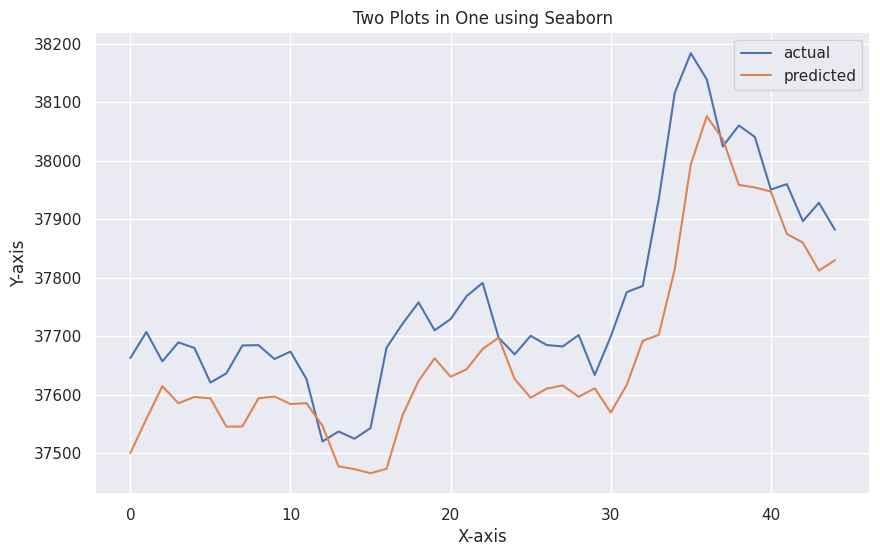

In [17]:
#plotting the predictions


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set Seaborn style
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Create the first plot using Seaborn

#Y_test = np.transpose(Y_test)
#Y_pred = np.transpose(Y_pred)
sns.lineplot(np.squeeze(Y_test), label='actual')

# Create the second plot on the same axes
sns.lineplot(np.squeeze(Y_pred), label='predicted')

#sns.lineplot(openings[1000:1100], label='open')


# Set labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Two Plots in One using Seaborn')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [18]:
#calculation of fitness for the predicted data

def calculate_fitness_ratio(original_data, model_data):
    # Assuming original_data and model_data are lists or arrays of the same length
    sum_squared_diff = sum((o - m) ** 2 for o, m in zip(original_data, model_data))
    sum_squared_original = sum(o ** 2 for o in original_data)
    
    fitness_ratio = 1 - (sum_squared_diff / sum_squared_original)
    return fitness_ratio

result = calculate_fitness_ratio(Y_test[0], Y_pred[0])
print(f"The fitness ratio is: {result}")

The fitness ratio is: 0.9999813694879252


In [19]:
#The first Out of Sample for evaluation

# Read the CSV file
OS_1 = pd.read_csv('/kaggle/input/btcusdt-different-timeframes/BTCUSDT-1h.csv')

# Convert Unix timestamp column to datetime
OS_1['open_time'] = pd.to_datetime(OS_1['open_time'], unit='ms')

# Define start_date and end_date
start_date = '2023-12-30'
end_date = '2023-12-31'

# Filter the DataFrame to include only rows within the specified date range
OS_1 = OS_1[(OS_1['open_time'] >= start_date) & (OS_1['open_time'] <= end_date)]

# Rename columns
OS_1 = OS_1.rename(columns={
    'open': 'Open',
    'close': 'Close',
    'high': 'High',
    'low': 'Low',
    'volume': 'Volume'
})

# Now your DataFrame has the column with datetime values and is filtered by date
print(OS_1)

                open_time      Open      High       Low     Close      Volume  \
55692 2023-12-30 00:00:00  42066.94  42209.22  42011.23  42094.56   915.96116   
55693 2023-12-30 01:00:00  42094.57  42207.26  42079.08  42165.94   837.32212   
55694 2023-12-30 02:00:00  42165.94  42186.10  41844.86  41905.80   820.78768   
55695 2023-12-30 03:00:00  41905.81  42011.10  41820.00  41972.81   628.13186   
55696 2023-12-30 04:00:00  41972.81  42062.92  41969.49  41990.00   562.07695   
55697 2023-12-30 05:00:00  41990.01  42131.10  41976.01  42104.00   595.32538   
55698 2023-12-30 06:00:00  42104.01  42160.00  42035.82  42050.35   536.95075   
55699 2023-12-30 07:00:00  42050.35  42128.62  41930.43  41947.16   657.46917   
55700 2023-12-30 08:00:00  41947.16  41988.62  41540.85  41575.91  1627.92971   
55701 2023-12-30 09:00:00  41575.91  41726.13  41520.30  41691.09  1306.66175   
55702 2023-12-30 10:00:00  41691.10  41818.49  41678.07  41807.05   915.51897   
55703 2023-12-30 11:00:00  4

In [20]:
#The Second Out of Sample for evaluation


# Read the CSV file
OS_2 = pd.read_csv('/kaggle/input/btcusdt-different-timeframes/BTCUSDT-5m.csv')

# Convert Unix timestamp column to datetime
OS_2['open_time'] = pd.to_datetime(OS_2['open_time'], unit='ms')

# Define start_date and end_date
start_date = '2023-01-01'
end_date = '2023-12-31'

# Filter the DataFrame to include only rows within the specified date range
OS_2 = OS_2[(OS_2['open_time'] >= start_date) & (OS_2['open_time'] <= end_date)]

# Rename columns
OS_2 = OS_2.rename(columns={
    'open': 'Open',
    'close': 'Close',
    'high': 'High',
    'low': 'Low',
    'volume': 'Volume'
})

# Now your DataFrame has the column with datetime values and is filtered by date
print(OS_2)

                 open_time      Open      High       Low     Close     Volume  \
563597 2023-01-01 00:00:00  16541.77  16544.76  16527.51  16535.38  486.60903   
563598 2023-01-01 00:05:00  16534.91  16540.43  16522.55  16526.67  391.19043   
563599 2023-01-01 00:10:00  16526.67  16530.87  16520.00  16520.69  294.73889   
563600 2023-01-01 00:15:00  16521.26  16537.73  16517.72  16534.94  481.18777   
563601 2023-01-01 00:20:00  16534.94  16540.66  16532.33  16535.54  309.53189   
...                    ...       ...       ...       ...       ...        ...   
668409 2023-12-30 23:40:00  42212.36  42212.37  42162.00  42179.36   57.42538   
668410 2023-12-30 23:45:00  42179.36  42205.01  42179.36  42205.01   29.47366   
668411 2023-12-30 23:50:00  42205.01  42219.61  42198.84  42206.47   33.45493   
668412 2023-12-30 23:55:00  42206.47  42206.47  42133.95  42140.28   46.27788   
668413 2023-12-31 00:00:00  42140.29  42206.12  42140.28  42206.12   54.02019   

        num_trades  taker_b

### Here I'm showing results for the second.

In [21]:
#Data Preprocessing

time_steps = 14

H = OS_2[["High"]].to_numpy().astype(np.float32).copy()[:-1]
L = OS_2[["Low"]].to_numpy().astype(np.float32).copy()[:-1]
C = OS_2[["Close"]].to_numpy().astype(np.float32).copy()[:-1]
O = OS_2[["Open"]].to_numpy().astype(np.float32).copy()[1:]
V = OS_2[["Volume"]].to_numpy().astype(np.float32).copy()[:-1]

Y = OS_2[["Close"]].to_numpy().astype(np.float32).copy()[time_steps+1:]
C = np.nan_to_num(C, nan=0.0)

In [22]:
#SD and Skew

ts_n_SD = 7
ts_SD = []
for i in range(time_steps-ts_n_SD,len(C)-ts_n_SD):
    SD = np.std(C[i:i+ts_n_SD])
    ts_SD.append(SD)
ts_SD = np.expand_dims(np.array(ts_SD),axis=1)

ts_n_Skw =7
ts_Skw = []
for i in range(time_steps-ts_n_Skw,len(C)-ts_n_Skw):
    Skw = skew(C[i:i+ts_n_Skw])
    ts_Skw.append(Skw)
ts_Skw = np.expand_dims(np.array(ts_Skw),axis=1)


/tmp/ipykernel_42/3742252150.py:13: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



In [23]:
#In case we get smth like Skw = 0 or SD ~ 0
import math

ts_Skw = [0 if math.isnan(item) else item for item in ts_Skw]

In [24]:
#Feature Generation

Features = np.concatenate((H,L,C,O,V),axis = 1)
temp = Features[0:-time_steps]
temp = np.expand_dims(temp,axis = 1)
j=0
for i in range(1,time_steps):
    j = j+1
    boo = Features[i : i - time_steps]
    boo = np.expand_dims(boo,axis = 1)
    j = j+len(boo)
    temp = np.concatenate((temp,boo),axis = 1)
Features = temp

print(Features.shape)
print(j)

Predictions = model_gru.predict(Features)

(104802, 14, 5)
1362439
3276/3276 [==============================] - 165s 50ms/step


Here we dont trade for the first 7 days, but using those data we trade on the next week

In [25]:
Predictions = Predictions[ts_n_SD:]
Y = Y[ts_n_SD:]
Cost = O[ts_n_SD:].copy()
ts_SD = ts_SD[7:]
ts_Skw = ts_Skw[7:]

print(Features.shape)
print(Y.shape)
print(Predictions.shape)
print(ts_SD.shape)

(104802, 14, 5)
(104795, 1)
(104795, 1)
(104795, 1)


In [42]:
#The Algorithm used to make trades


start_price = 100000
holdings = 0
Account = start_price
Price_at_hand = []
Decisions_log = []
Cmsn_prcnt = 0.15

num_buys = 0
num_sells = 0
num_holds = 0

incorrect_buys = 0
incorrect_sells = 0

# Additional variables for trade analysis
trades = []  # List to store individual trade outcomes
current_trade = {'type': None, 'entry_price': None, 'exit_price': None}

def close_trade(exit_price):
    global current_trade

    if current_trade['type'] is not None:
        current_trade['exit_price'] = exit_price
        trades.append(current_trade.copy())
        current_trade = {'type': None, 'entry_price': None, 'exit_price': None}


# Additional variables for profit calculations
gross_profit = 0
gross_loss = 0
net_profit = 0

#Additional variables for max drawdown calculation
drawdown_data = {'peak_value': start_price, 'trough_value': start_price, 'drawdowns': []}

trading_days_per_year = 365 * 24 * 12  # Assuming 5-minute intervals


def calculate_drawdown(value):
    if value > drawdown_data['peak_value']:
        drawdown_data['peak_value'] = value
    else:
        drawdown = (drawdown_data['peak_value'] - value) / drawdown_data['peak_value']
        drawdown_data['drawdowns'].append(drawdown)
        drawdown_data['trough_value'] = min(drawdown_data['trough_value'], value)


def What_to_do(Pred,Open,Skew,SD):
    if(Pred > Open):
        if(Skew>1):
            return('B',0.25)
        elif(Skew>0.5):
            if(Open + 2*SD<Pred):
                return('B',0.15)
            else:
                return('B',0.1)
        elif(Skew>0):
            if(Open + 1*SD<Pred):
                return('B',0.05)
            else:
                return('H',0)
        elif(Skew>-0.5):
            return('H',0)
        elif(Skew>-1):
            return('H',0)
        else:
            return('H',0)
    if(Pred < Open):
        if(Skew>1):
            return('H',0)
        elif(Skew>0.5):
            return('H',0)
        elif(Skew>0):
            return('H',0)
        elif(Skew>-0.5):
            if(Open <Pred + 1*SD):
                return('S',0.05)
            else:
                return('H',0)
        elif(Skew>-1):
            if(Open < 2*SD + Pred):
                return('S',0.1)
            else:
                return('S',0.15)
        else:
            return('S',0.25)
    return('H',0)

for i in range(0, len(Y)):
    Decision, call = What_to_do(Predictions[i], Cost[i], ts_Skw[i], ts_SD[i])

    if Decision == 'B':
        if Account - call * Cost[i] >= 0:
            num_buys += 1
            Account = Account - call * Cost[i] - Cmsn_prcnt*call * Cost[i]/100
            holdings = holdings + call
            Decisions_log.append(('Buy', call, Cost[i], i))
            if Y[i] > Cost[i]:  # Incorrect buy
                incorrect_buys += 1
            gross_profit += call * (Y[i] - Cost[i])
        else:
            num_holds += 1
        
    elif Decision == 'S':
        
        if holdings - call >= 0:
            num_sells += 1
            Account = Account + call * Cost[i] - Cmsn_prcnt*call*Cost[i]/100
            holdings = holdings - call
            Decisions_log.append(('Sell', call, Cost[i], i))
            if Y[i] < Cost[i]:  # Incorrect sell
                incorrect_sells += 1
            gross_loss += call * (Cost[i] - Y[i])
        else:
            num_holds += 1
        
    else:
        num_holds += 1
    Price_at_hand.append(Account + holdings*Y[i] - start_price)
    calculate_drawdown(Account + holdings * Y[i])

    
print(Account + holdings*Y[-1])
print(Account)
print(holdings)


# Display the number of buys, sells, and holds
print("\nNumber of Buys:", num_buys)
print("Number of Sells:", num_sells)
print("Number of Holds:", num_holds)

# Display the number of incorrect buys and sells
print("\nNumber of Incorrect Buys:", incorrect_buys)
print("Number of Incorrect Sells:", incorrect_sells)


# Calculate net profit
net_profit = gross_profit - gross_loss

# Print results
print("Gross Profit:", np.squeeze(gross_profit))
print("Gross Loss:", np.squeeze(gross_loss))
print("Net Profit:", np.squeeze(net_profit))

# Calculate annual returns
final_portfolio_value = Account + holdings * Y[-1]
annual_returns = (final_portfolio_value / start_price) ** (trading_days_per_year / len(Y)) - 1

# Print maximum drawdown in percentage
max_drawdown_percentage = np.max(drawdown_data['drawdowns']) * 100
print("Maximum Drawdown:", max_drawdown_percentage, "%")

# Print annual returns in percentage
annual_returns_percentage = annual_returns * 100
print("Annual Returns:", np.squeeze(annual_returns_percentage), "%")


# Additional variables for buy and hold return calculation
buy_and_hold_return = (Y[-1] - Y[0]) / Y[0] * 100
print("Buy and Hold Return:", np.squeeze(buy_and_hold_return), "%")

[349480.96683884]
[347370.66068649]
0.04999999999987065

Number of Buys: 10922
Number of Sells: 8725
Number of Holds: 85148

Number of Incorrect Buys: 10713
Number of Incorrect Sells: 5054
Gross Profit: 197541.72
Gross Loss: 74383.695
Net Profit: 123158.02
Maximum Drawdown: 6.016411494062365 %
Annual Returns: 250.83979138836833 %
Buy and Hold Return: 155.08492 %


In [43]:
import numpy as np

def sharpe_ratio(returns, risk_free_rate=0):
    """
    Calculate the Sharpe Ratio.

    Parameters:
    - returns (numpy.ndarray or list): Array or list of returns from the trading strategy.
    - risk_free_rate (float): The annual risk-free rate. Default is 0.

    Returns:
    - float: Sharpe Ratio.
    """

    # Calculate the average return and standard deviation of returns
    avg_return = np.mean(returns)
    std_dev = np.std(returns)

    # Calculate the annualized Sharpe Ratio
    sharpe_ratio = (avg_return - risk_free_rate) / std_dev

    return sharpe_ratio

In [44]:
# Assuming Price_at_hand contains your strategy's returns
sharpe = sharpe_ratio(Price_at_hand)

print("Sharpe Ratio:", sharpe)

Sharpe Ratio: 2.1032782863193664
